# Information Bottleneck Theory

## 1. Basic idea

The basic idea behind information bottleneck theory is to estimate how much information from one layer of a NN is carried to another. One particular measure one that measures this effect is the  `Mutual Information` (MI). However we need to estimate it, since we a direct computation is too time consuming and in general not known. During the training we can look at how the MI evolves. Of particular interest is the mutual information between the input and some intermediate layer, aswell as the MI between some intermediate layer and the output layer. This evolution can help us understand what happens inside the network during training. 

## 2. Understanding the Math and Theory

### Mutual Information

The mutual information (MI) is an important indicator for exploring what happens inside a neural network during training because it shows how the networks develop and if there is compression. In general, it describes the statistical correlation between two random variables. The definition of the mutual information $I (X ; Y )$ is given by 
$$I(X; Y ) = H(Y ) − H(Y |X)$$
where $H(Y)$ is the individual entropy of the output Y (red circle) and $H(Y|X)$ the conditional entropy (red circle minus the orange part).

![](https://drive.google.com/uc?export=view&id=195nKURIvl9KOb4oeaJ9sS_3jjNiIzpPW)


In neural networks the random variables are neurons or layers of neurons M. On the one hand it is possible to compute the MI of the input layer X which is $I(X;T)$. On the other hand there also is the mutual information from M to the output layer Y $I(Y,T)$. But due to the fact that we don’t know the exact probability distributions of the random variables it is not possible to compute the MI exactly. That is why we need to find some approximation methods.

![](https://drive.google.com/uc?export=view&id=1s8XfceJEbiQBVFYG_JV0v2y6sszDw6Ng)


### Methods to estimate the Mutual Information

There are many methods to estimate the mutual information. Some expamples are:
* Upper and lower bound
* Binning (approximate the MI by discretizising the neuron's output) https://arxiv.org/pdf/1703.00810.pdf 
* Mutual Information Neural Estimation (MINE) https://arxiv.org/pdf/1801.04062.pdf 

### Information Bottleneck Theory


The information bottleneck bound (IB-bound) is a construct to find the best tradeoff between precision of the prognosis for output Y and a compression of the input X for every layer. To find the optimal IB-bound the mutual information of the output $I(Y;M)$ should be as high as possible for a high precision of the prediction. The mutual information of the input $I(X;M)$ should be as low as possible for a high compression. The best case limit can formally be expressed as 
$$\min_{p(t|x),\, p(y|t),\, p(t)} I(X;T) - \beta I(Y;T)$$ 
where the Lagrange multiplicator β determines the set of relevant information that is kept in the representation $I (Y ; T )$. The minimum of the probability distributions $p$ of the random variables $x, t$ and $y$ has to be found. The families $X, T$ and $Y$ of the random variables follow a Markov chain $Y → X → T$. This implies that $I (X ; Y ) ≥ I(Y;T)$. Which in turn means that the mutual information between input $X$ and output $Y$ is greater than the mutual information between layer $T$ and output $Y$ or the same size.

In his work ''Opening the black box of Deep Neural Networks via Information" Tishby investigated into the influence of different parameters of neural networks on the mutual information and how the mutual information develops during training. His results are based on his understanding of the IB-bound described above. In his experiments Tishby tries to come as close to the IB-bound as possible. His analysis is based on the assumption that a low mutual information of the input I(X;M) stands for compression of the data and leads to well generalized networks. We want this generalization for a higher robustness of the networks, because it improves their performance on noisy data.
Tishby discovered two phases that happen during the training of a neural network: the first one is the fitting phase where the network fits the training data. Most of the training epochs are spent on compressing the input, so that the network can represent the data and its relationships more efficiently. Nevertheless Tishby's theory is heavily disputed.


Plots of MI can look as follows:

![](https://drive.google.com/uc?export=view&id=1yicpqdcQvX60pa9SwO96LiRjNPqEpLZP)

On the x-axis we can see the MI between the input and layer $M$ wich is the MI of the input. On the y-axis is the MI between the layer $M$ and the output. Because of the decreasing MI of the input in the later epochs, the diagram suggests that the network compresses input data. 

More information about the Information Bottleneck theory can be found here: https://arxiv.org/pdf/1703.00810.pdf

The MI is related to the "Kullback-Leibler-divergence" which measures how much two probability distributions $P, Q$ differ (and is easier to compute/estimate). It is given by 
$$
\mathrm{KL}(P, Q) = \sum_{x} P(x) \ln\left(\frac{P(x)}{Q(x)}\right) .
$$
Imagine a dice with faces 1 to 6. Consider for example $P$ to be the constant or fair distribution, where every face is equally likely to show up. Then consider different variations where '1' shows up $50\,\%$ or $90\,\%$ of the time. The KL-divergence will increase, because both differ from the fair distribution. 

In [ ]:
# Computation example for the KL divergence
import numpy as np 
x = [1, 2, 3, 4, 5, 6]
P = [1/6] * 6 
Q1 = P 
Q2 = [1/2] + [1/10] * 5 
Q3 = [9/10] + [1/50] * 5 

KL1 = np.sum([P[i] * np.log(P[i] / Q1[i]) for i in range(len(P))])
KL2 = np.sum([P[i] * np.log(P[i] / Q2[i]) for i in range(len(P))])
KL3 = np.sum([P[i] * np.log(P[i] / Q3[i]) for i in range(len(P))])
print(KL1, KL2, KL3)

0.0 0.24258597169364052 1.4858197879050374



## 3. Coding part

The notebook is based on https://github.com/artemyk/ibsgd by Artemy Kolchinsky. More notebooks for other data sets such as MNIST can be found there, too.

### Installation and imports

In [ ]:
! git clone https://gist.github.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04 'stroke'
! git clone https://github.com/artemyk/ibsgd 'MI'
! git clone https://github.com/mahmouddraz/xai 'xai_workshop'

fatal: destination path 'stroke' already exists and is not an empty directory.
fatal: destination path 'MI' already exists and is not an empty directory.
fatal: destination path 'xai_workshop' already exists and is not an empty directory.


In [ ]:
# Needs to be executed once. Start runtime afterwards.
!pip install -r /content/xai_workshop/requirements/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 5.4 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 146 kB 41.7 MB/s 
     |████████████████████████████████| 147 kB 10.5 MB/s 
     |████████████████████████████████| 402 kB 49.6 MB/s 
     |████████████████████████████████| 178 kB 46.3 MB/s 
     |████████████████████████████████| 114 kB 28.3 MB/s 
     |████████████████████████████████| 3.8 MB 47.8 MB/s 
     |████████████████████████████████| 2.9 MB 36.6 MB/s 
     |████████████████████████████████| 120 kB 33.5 MB/s 
     |████████████████████████████████| 785 kB 52.6 MB/s 
     |████████████████████████████████| 121 kB 47.2 MB/s 
     |████████████████████████████████| 1.4 MB 40.4 MB/s 
     |████████████████████████████████| 125 kB 56.5 MB/s 
     |██████████████████████████████

In [ ]:
from __future__ import absolute_import, division, print_function
import keras
import keras.backend as K
import tensorflow as tf
import numpy as np
import pandas as pd

from collections import namedtuple
from keras import regularizers
from keras.layers.core import Dropout
from tensorflow.keras.layers import Layer
from tensorflow.keras.activations import relu,sigmoid, softmax, tanh

from sklearn.model_selection import train_test_split

import sys 
sys.path.insert(0, "/content/MI")
import utils
import loggingreporter 

Using TensorFlow backend.


### Prepare Stroke data for the network

Before we can train the network we need to adjust the data by oversampling and delete id-feature.

In [ ]:
data = pd.read_csv('/content/stroke/healthcare-dataset-stroke-data.csv')

# BMI-value often is NaN, so we need to replace it with 0
data.bmi = data.bmi.fillna(0)
data = data.drop(np.where(data['gender']=='Other')[0])

# Replace String values by introducing dummys
data_with_dummys = pd.get_dummies(data)

# Delete the id-column because it's not important for us
data_with_dummys.drop(["id"], axis=1, inplace=True)

# Split the data into train and test
test_split = 0.2

train, test = train_test_split(data_with_dummys, test_size=test_split)
train_x, train_y  =  train.iloc[:, train.columns != 'stroke'], train.iloc[:, train.columns == 'stroke']
test_x , test_y   =  test.iloc[:, test.columns != 'stroke']  , test.iloc[:, train.columns == 'stroke']

# Oversample the dataset to have more datapoints with labels that were rare in the original dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

# Convert from pandas dataframe to numpy and oversample
np_x = train_x.to_numpy()
np_y = train_y.to_numpy()
np_x, np_y = oversample.fit_resample(np_x, np_y)

# Convert from numpy back to pandas dataframe
over_x = pd.DataFrame(np_x, columns=train_x.columns)
over_y = pd.Series(np_y, name="ytrain")

Prepare train and test data

In [ ]:
# trn and tst are namedtuples with training and test data with 
# X - feature values
# y - class, as number from 0 to 1
# Y - class as a 2-dimensional vector with one entry to 1

nb_classes = 2 # Number of classes
(X_train, y_train), (X_test, y_test) = (over_x.to_numpy(), over_y.to_numpy()), (test_x.to_numpy(), test_y.to_numpy())

Y_train = keras.utils.np_utils.to_categorical(y_train, nb_classes).astype('float32')
Y_test  = keras.utils.np_utils.to_categorical(y_test, nb_classes).astype('float32')

Dataset = namedtuple('Dataset',['X','Y','y','nb_classes'])
trn = Dataset(X_train, Y_train, y_train, nb_classes)
tst = Dataset(X_test , Y_test, np.ravel(y_test), nb_classes)
del X_train, X_test, Y_train, Y_test, y_train, y_test

Configure the network settings

In [ ]:
################# Cell needs to be completed #################

cfg = {}
cfg['SGD_BATCHSIZE']    =     # How many data points in one batch
cfg['SGD_LEARNINGRATE'] =     # How fast should the weights be adjusted
cfg['NUM_EPOCHS']       =     # Number of epochs
cfg['FULL_MI']          = True
cfg['ACTIVATION']       =     # Activation function, could be tanh, relu, softplus or softsign
cfg['MAX_EPOCHS']       = cfg['NUM_EPOCHS']
cfg['LAYER_DIMS']       =    # Network dimensions (neurons per layer)

# Directory to save data during training
ARCH_NAME =  '-'.join(map(str,cfg['LAYER_DIMS']))
cfg['SAVE_DIR'] = 'rawdata/' + cfg['ACTIVATION'] + '_' + ARCH_NAME 

Create the network based on the settings above

In [ ]:
# Input (features of the stroke dataset)
input_layer = keras.layers.Input((trn.X.shape[1],))
clayer = input_layer
for n in cfg['LAYER_DIMS']:
    # Add dense layers of the size configured above
    clayer = keras.layers.Dense(n, 
                                activation=cfg['ACTIVATION'],
                                kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=1/np.sqrt(float(n)), seed=None),
                                bias_initializer='zeros'
                               )(clayer)
# Output has size 2
output_layer = keras.layers.Dense(trn.nb_classes, activation='softmax')(clayer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

# Using the adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=cfg['SGD_LEARNINGRATE'])

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

We don't estimate the MI for every epoch, just selected ones

In [ ]:
def do_report(epoch):
    if epoch < 30:      
        return True
    elif epoch < 100:   
        return (epoch % 5 == 0)
    elif epoch < 1000:  
        return (epoch % 20 == 0)
    else:     
        return (epoch % 100 == 0)

### Train network and log data

In [ ]:
# The reporter is a callback that will be executed for selected epochs
reporter = loggingreporter.LoggingReporter(cfg=cfg,                  # Configuration
                                          trn=trn,                   # Training data
                                          tst=tst,                   # Testing data
                                          do_save_func=do_report)    # Estimate for this epoch?
# Start the training
r = model.fit(x=trn.X, y=trn.Y,                   # Training features data and classes
              verbose    = 2,                     # Printing a progress bar while training 
              batch_size = cfg['SGD_BATCHSIZE'],  # Number of batches
              epochs     = cfg['NUM_EPOCHS'],     # Number of epochs
              # validation_data=(tst.X, tst.Y),
              callbacks  = [reporter,])           # After every epoch, call the reporter

Making directory rawdata/relu_10-7-5-4-3
Epoch 1/2000
 - 1s - loss: 4.0635 - accuracy: 0.5000
Saving rawdata/relu_10-7-5-4-3/epoch00000000
Epoch 2/2000
 - 0s - loss: 2.2961 - accuracy: 0.5000
Saving rawdata/relu_10-7-5-4-3/epoch00000001
Epoch 3/2000
 - 0s - loss: 1.2344 - accuracy: 0.5134
Saving rawdata/relu_10-7-5-4-3/epoch00000002
Epoch 4/2000
 - 0s - loss: 0.7960 - accuracy: 0.5420
Saving rawdata/relu_10-7-5-4-3/epoch00000003
Epoch 5/2000
 - 0s - loss: 0.6905 - accuracy: 0.5357
Saving rawdata/relu_10-7-5-4-3/epoch00000004
Epoch 6/2000
 - 0s - loss: 0.6792 - accuracy: 0.5619
Saving rawdata/relu_10-7-5-4-3/epoch00000005
Epoch 7/2000
 - 0s - loss: 0.6759 - accuracy: 0.5669
Saving rawdata/relu_10-7-5-4-3/epoch00000006
Epoch 8/2000
 - 0s - loss: 0.6725 - accuracy: 0.5711
Saving rawdata/relu_10-7-5-4-3/epoch00000007
Epoch 9/2000
 - 0s - loss: 0.6691 - accuracy: 0.5820
Saving rawdata/relu_10-7-5-4-3/epoch00000008
Epoch 10/2000
 - 0s - loss: 0.6658 - accuracy: 0.5927
Saving rawdata/relu_10-

## 2. Compute MI

First, prepare everything for the computation

In [ ]:
# Imports
from __future__ import print_function
%load_ext autoreload
%autoreload 2
import os
if not os.path.exists('plots/'):
    os.mkdir('plots')

from six.moves import cPickle
from collections import defaultdict, OrderedDict
from copy import copy

import numpy as np
import keras.backend as K

import kde
import simplebinmi

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')

import utils

In [ ]:
FULL_MI           = cfg['FULL_MI']
infoplane_measure = 'bin'             # What plot do we want to show (could be upper as well)
DO_SAVE           = True              # Save the plot?
DO_LOWER          = (infoplane_measure == 'lower')   # Whether to compute lower bounds also
DO_BINNED         = (infoplane_measure == 'bin')     # Whether to compute MI estimates based on binning
NUM_LABELS        = 2                  # Just two labels: stroke or no stroke
COLORBAR_MAX_EPOCHS = cfg['NUM_EPOCHS']# Same as max epochs
DIR_TEMPLATE      = '%%s_%s'%ARCH_NAME # Name of the directory (based on the network settings)

# Functions to return upper and lower bounds on entropy of layer activity
noise_variance = 1e-3                   # Added Gaussian noise variance
binsize = 0.5                           # size of bins for binning method
Klayer_activity = K.placeholder(ndim=2) # Keras placeholder 
entropy_func_upper = K.function([Klayer_activity,], [kde.entropy_estimator_kl(Klayer_activity, noise_variance),])
entropy_func_lower = K.function([Klayer_activity,], [kde.entropy_estimator_bd(Klayer_activity, noise_variance),])

# nats to bits conversion factor
nats2bits = 1.0/np.log(2) 

# Save indexes of tests data for each of the output classes
saved_labelixs = {}
full = utils.construct_full_dataset(trn,tst)
y = full.y
Y = full.Y

for i in range(NUM_LABELS):
    saved_labelixs[i] = y == i

labelprobs = np.mean(Y, axis=0)

# Data structure used to store results - activation can also be tanh, softplus or softsign
activation = 'relu'
measures = OrderedDict()
measures[activation] = {}

Now we estimate the MI by using the upper bound method and later on we also compute the lower bound and use the binning method.

In [ ]:
# Find directory where the logged data is stored in
cur_dir = 'rawdata/' + DIR_TEMPLATE % activation
if not os.path.exists(cur_dir):
    print("Directory %s not found" % cur_dir)
    
print('Starting to compute MI')

# Iterate over all epochs
for epochfile in sorted(os.listdir(cur_dir)):
   
    fname = cur_dir + "/" + epochfile
    with open(fname, 'rb') as f:
        d = cPickle.load(f)

    epoch = d['epoch']

    print("Doing", fname)
    
    # Count layers and add them to a list
    num_layers = len(d['data']['activity_tst'])
    PLOT_LAYERS = []
    for lndx in range(num_layers):
        PLOT_LAYERS.append(lndx)
            
    cepochdata = defaultdict(list)

    # Iterate over all layers
    for lndx in range(num_layers):
        activity = d['data']['activity_tst'][lndx]

        # Compute marginal entropies
        h_upper = entropy_func_upper([activity,])[0]
        if DO_LOWER:
            h_lower = entropy_func_lower([activity,])[0]
            
        # Layer activity given input. This is simply the entropy of the Gaussian noise
        hM_given_X = kde.kde_condentropy(activity, noise_variance)

        # Compute conditional entropies of layer activity given output
        hM_given_Y_upper=0.
        for i in range(NUM_LABELS):
            hcond_upper = entropy_func_upper([activity[saved_labelixs[i],:],])[0]
            hM_given_Y_upper += labelprobs[i] * hcond_upper
            
        if DO_LOWER:
            hM_given_Y_lower=0.
            for i in range(NUM_LABELS):
                hcond_lower = entropy_func_lower([activity[saved_labelixs[i],:],])[0]
                hM_given_Y_lower += labelprobs[i] * hcond_lower
            
        cepochdata['MI_XM_upper'].append( nats2bits * (h_upper - hM_given_X) )
        cepochdata['MI_YM_upper'].append( nats2bits * (h_upper - hM_given_Y_upper) )
        cepochdata['H_M_upper'  ].append( nats2bits * h_upper )

        pstr = 'upper: MI(X;M)=%0.3f, MI(Y;M)=%0.3f' % (cepochdata['MI_XM_upper'][-1], cepochdata['MI_YM_upper'][-1])
        if DO_LOWER:  # Compute lower bounds
            cepochdata['MI_XM_lower'].append( nats2bits * (h_lower - hM_given_X) )
            cepochdata['MI_YM_lower'].append( nats2bits * (h_lower - hM_given_Y_lower) )
            cepochdata['H_M_lower'  ].append( nats2bits * h_lower )
            pstr += ' | lower: MI(X;M)=%0.3f, MI(Y;M)=%0.3f' % (cepochdata['MI_XM_lower'][-1], cepochdata['MI_YM_lower'][-1])

        if DO_BINNED: # Compute binned estimates
            binxm, binym = simplebinmi.bin_calc_information2(saved_labelixs, activity, binsize)
            cepochdata['MI_XM_bin'].append( nats2bits * binxm )
            cepochdata['MI_YM_bin'].append( nats2bits * binym )
            pstr += ' | bin: MI(X;M)=%0.3f, MI(Y;M)=%0.3f' % (cepochdata['MI_XM_bin'][-1], cepochdata['MI_YM_bin'][-1])
                    
        print('- Layer %d %s' % (lndx, pstr) )

    measures[activation][epoch] = cepochdata

Starting to compute MI
Doing rawdata/relu_10-7-5-4-3/epoch00000000
- Layer 0 upper: MI(X;M)=11.048, MI(Y;M)=0.991 | bin: MI(X;M)=11.203, MI(Y;M)=0.992
- Layer 1 upper: MI(X;M)=11.187, MI(Y;M)=0.992 | bin: MI(X;M)=11.126, MI(Y;M)=0.977
- Layer 2 upper: MI(X;M)=8.024, MI(Y;M)=0.385 | bin: MI(X;M)=5.716, MI(Y;M)=0.130
- Layer 3 upper: MI(X;M)=7.116, MI(Y;M)=0.258 | bin: MI(X;M)=4.890, MI(Y;M)=0.103
- Layer 4 upper: MI(X;M)=6.459, MI(Y;M)=0.194 | bin: MI(X;M)=4.119, MI(Y;M)=0.086
- Layer 5 upper: MI(X;M)=0.706, MI(Y;M)=0.009 | bin: MI(X;M)=-0.000, MI(Y;M)=-0.000
Doing rawdata/relu_10-7-5-4-3/epoch00000001
- Layer 0 upper: MI(X;M)=11.119, MI(Y;M)=0.991 | bin: MI(X;M)=11.203, MI(Y;M)=0.992
- Layer 1 upper: MI(X;M)=11.193, MI(Y;M)=0.992 | bin: MI(X;M)=11.134, MI(Y;M)=0.981
- Layer 2 upper: MI(X;M)=7.608, MI(Y;M)=0.336 | bin: MI(X;M)=5.212, MI(Y;M)=0.136
- Layer 3 upper: MI(X;M)=6.653, MI(Y;M)=0.229 | bin: MI(X;M)=4.315, MI(Y;M)=0.114
- Layer 4 upper: MI(X;M)=5.904, MI(Y;M)=0.177 | bin: MI(X;M

### Plotting the results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


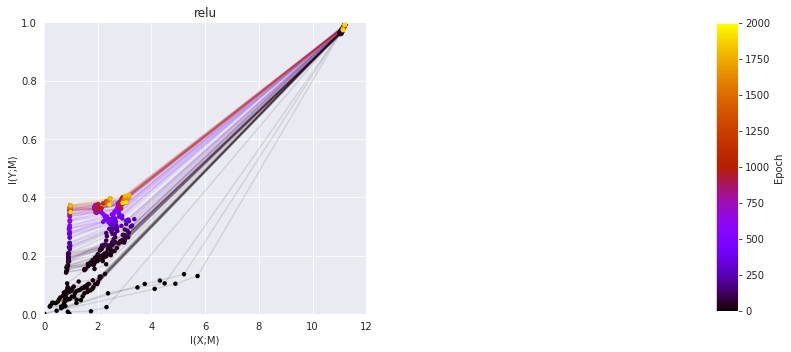

In [ ]:
max_epoch = max( (max(vals.keys()) if len(vals) else 0) for vals in measures.values())
sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=0, vmax=COLORBAR_MAX_EPOCHS))
sm._A = []

fig = plt.figure(figsize=(12, 8))

# Iterate over all measures (in our case only one)
for actndx, (activation, vals) in enumerate(measures.items()):
    epochs = sorted(vals.keys())
    if not len(epochs):
        continue
    #ax = plt.subplot(1, 2, actndx+1)    
    ax = plt.subplot(1, len(measures.items()), actndx+1)

    # plot every epoch seperatly
    for epoch in epochs:
        c = sm.to_rgba(epoch)
        xmvals = np.array(vals[epoch]['MI_XM_'+infoplane_measure])[PLOT_LAYERS]
        ymvals = np.array(vals[epoch]['MI_YM_'+infoplane_measure])[PLOT_LAYERS]

        ax.plot(xmvals, ymvals, c=c, alpha=0.1, zorder=1)
        ax.scatter(xmvals, ymvals, s=20, facecolors=[c for _ in PLOT_LAYERS], edgecolor='none', zorder=2)

    ax.ylim([0, 1])
    ax.xlim([0, 12])
    ax.xlabel('I(X;M)')
    ax.ylabel('I(Y;M)')
    ax.title(activation)
    
cbaxes = fig.add_axes([1.0, 0.125, 0.03, 0.8]) 
plt.colorbar(sm, label='Epoch', cax=cbaxes)
plt.tight_layout()

if DO_SAVE:
    plt.savefig('plots/' + DIR_TEMPLATE % ('infoplane_'+ARCH_NAME),bbox_inches='tight')

## 4. Exercises

### Homework:

Please answer the following questions:

1. What is the influence of the estimation method on the MI?
2. Check the influence of the following hyperparameters on the MI:

* Learning Rate 
* Activation function
* Network dimension

3. In how far is MI a good concept to understand the training process and the decisions of neural networks?